In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("emails.csv")
df.shape

(5172, 3002)

In [3]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [4]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
df.isnull().sum()
df.dropna(inplace=True)
df.shape
df=df.drop("Email No.",axis=1)

In [6]:
#model building
x=df.iloc[:,:-1]
x.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
# #to find value of k just knowledge purpose 
# accur=[]
# x=[]
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# for i in range(1,15):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     pred=knn.predict(x_test)
#     accur.append(accuracy_score(pred,y_test))
#     x.append(i)
# print(accur)


[0.8579710144927536, 0.8792270531400966, 0.8531400966183574, 0.8647342995169082, 0.8541062801932368, 0.8599033816425121, 0.8502415458937198, 0.855072463768116, 0.8531400966183574, 0.8560386473429952, 0.8483091787439614, 0.8560386473429952, 0.8483091787439614, 0.8570048309178744]


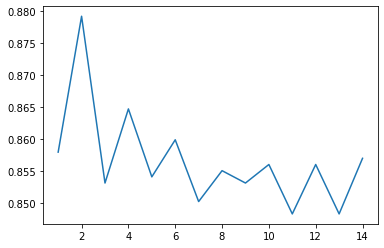

In [10]:
import matplotlib.pyplot as mp
# mp.plot(x,accur)

In [11]:
#we train the model with value of k=7
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(pred)

[0 0 0 ... 0 0 0]


In [17]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(pred,y_test))
cm=confusion_matrix(pred,y_test)
print(cm)
tn,fp,fn,tp=confusion_matrix(pred,y_test).ravel()
print(tn,fp,fn,tp)

0.8502415458937198
[[649  54]
 [101 231]]
649 54 101 231


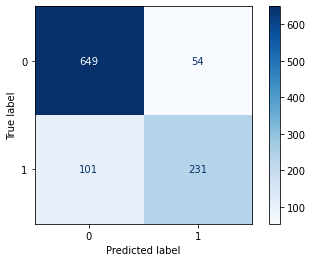

In [13]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap="Blues")
mp.show()

In [14]:
#SVM(gamma=auto is imp otherwise accuracy is very less)
from sklearn.svm import SVC
SVM=SVC(C=1.0,kernel="rbf",gamma="auto")
SVM.fit(x_train,y_train)
predi=SVM.predict(x_test)
print(predi)

[0 0 0 ... 1 0 0]


0.9004830917874396


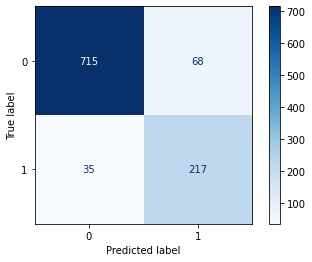

In [15]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(predi,y_test))
cm=confusion_matrix(predi,y_test)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap="Blues")
mp.show()